<h1> Huston, Texas Total Population x Mass Shootings
    

import libraries to read data, 

In [229]:
# to read and wrangle data
import pandas as pd

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

import income dataset

In [230]:
gdf = gpd.read_file('totalpophustonblockgroup.geojson')

show the block groups in huston, texas using black lines

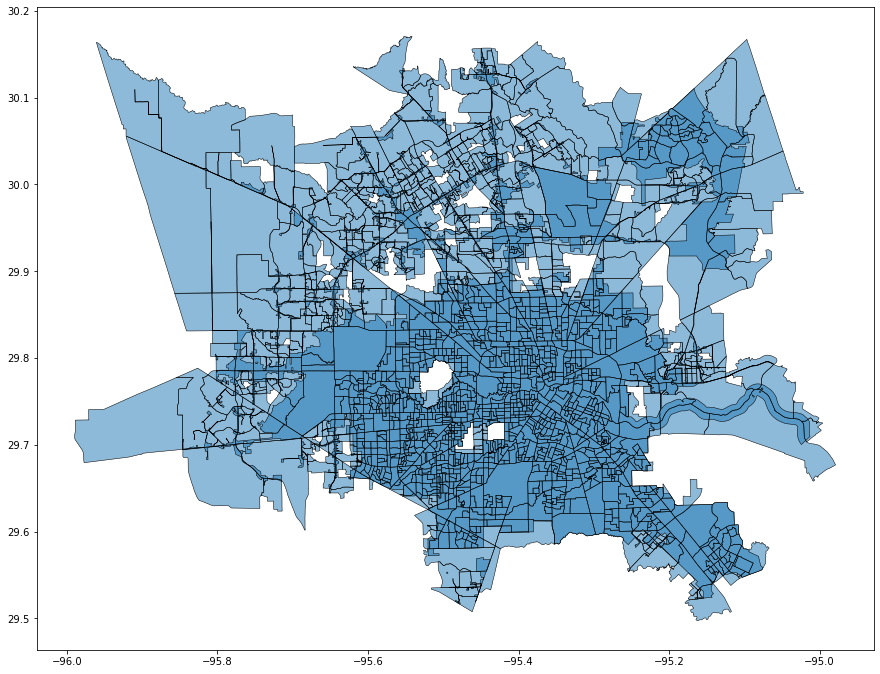

In [231]:
fig,ax = plt.subplots(figsize=(15,15))
gdf.plot(ax=ax,zorder=10,alpha=0.5)
gdf.boundary.plot(ax=ax,color='black',zorder=15,lw=0.5)

**data cleaning**

look at data types

In [232]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1863 non-null   object  
 1   name              1863 non-null   object  
 2   B01003001         1863 non-null   float64 
 3   B01003001, Error  1863 non-null   float64 
 4   geometry          1863 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 72.9+ KB


look at what columns we are working with

In [233]:
list(gdf)

['geoid', 'name', 'B01003001', 'B01003001, Error', 'geometry']

trim down the columns and rename them

In [234]:
gdf = gdf[['geoid','B01003001','geometry']]
gdf.columns = ['FIPS','TotalPop','geometry']

double check if renamed

In [235]:
gdf.head()

,FIPS,TotalPop,geometry
0,15000US481576701011,1086.0,"MULTIPOLYGON (((-95.46644 29.59672, -95.46620 ..."
1,15000US481576701012,1846.0,"MULTIPOLYGON (((-95.46828 29.59301, -95.46756 ..."
2,15000US481576701013,3190.0,"MULTIPOLYGON (((-95.45709 29.58659, -95.45672 ..."
3,15000US481576701014,511.0,"MULTIPOLYGON (((-95.46339 29.59427, -95.46324 ..."
4,15000US481576701021,2272.0,"MULTIPOLYGON (((-95.47123 29.58615, -95.47120 ..."


figure out what the last column is bc it is the total pop. of the city and it must be deleted

In [236]:
gdf.tail()

,FIPS,TotalPop,geometry
1858,15000US483396920022,8696.0,"MULTIPOLYGON (((-95.40544 30.09208, -95.40501 ..."
1859,15000US483396923004,2141.0,"MULTIPOLYGON (((-95.31474 30.09180, -95.31407 ..."
1860,15000US483396923005,8829.0,"MULTIPOLYGON (((-95.27522 30.09548, -95.27520 ..."
1861,15000US483396924003,6122.0,"MULTIPOLYGON (((-95.25503 30.03981, -95.25490 ..."
1862,16000US4835000,2310432.0,"MULTIPOLYGON (((-95.16953 29.80720, -95.16929 ..."


delete last row

In [237]:
gdf=gdf.drop(1862)

fix the fips code and check if it was done

In [238]:
gdf['FIPS'] = gdf['FIPS'].str.replace('15000US','')
gdf.tail()

,FIPS,TotalPop,geometry
1857,483396920021,6373.0,"MULTIPOLYGON (((-95.37754 30.11889, -95.37490 ..."
1858,483396920022,8696.0,"MULTIPOLYGON (((-95.40544 30.09208, -95.40501 ..."
1859,483396923004,2141.0,"MULTIPOLYGON (((-95.31474 30.09180, -95.31407 ..."
1860,483396923005,8829.0,"MULTIPOLYGON (((-95.27522 30.09548, -95.27520 ..."
1861,483396924003,6122.0,"MULTIPOLYGON (((-95.25503 30.03981, -95.25490 ..."


sort data by total population and then list the first 20 rows

In [239]:
gdf.sort_values(by='TotalPop').head(20)

,FIPS,TotalPop,geometry
1517,482015323002,0.0,"MULTIPOLYGON (((-95.52454 29.86555, -95.52409 ..."
1840,482019800001,4.0,"MULTIPOLYGON (((-95.28884 29.63928, -95.28882 ..."
798,482014103001,93.0,"MULTIPOLYGON (((-95.40883 29.76061, -95.40863 ..."
546,482013140011,103.0,"MULTIPOLYGON (((-95.40211 29.70140, -95.40090 ..."
253,482012322002,125.0,"MULTIPOLYGON (((-95.29556 29.91871, -95.29553 ..."
361,482012504022,201.0,"MULTIPOLYGON (((-95.16227 29.99858, -95.16209 ..."
1115,482014328024,204.0,"MULTIPOLYGON (((-95.52133 29.70898, -95.52132 ..."
115,482012123003,216.0,"MULTIPOLYGON (((-95.36665 29.77396, -95.36644 ..."
1767,482015532004,233.0,"MULTIPOLYGON (((-95.44941 30.02490, -95.44880 ..."
427,482012524003,245.0,"MULTIPOLYGON (((-95.15569 29.77374, -95.15554 ..."


delete rows that have less than a 100 population geographies

In [240]:
gdf = gdf[gdf['TotalPop']>100]

**Map the new map**

then get the layers into a web mercator projection and reproject to web mercator

In [241]:
gdf = gdf.to_crs(epsg=3857)

plot that baby, turn off the axis, and add a base map

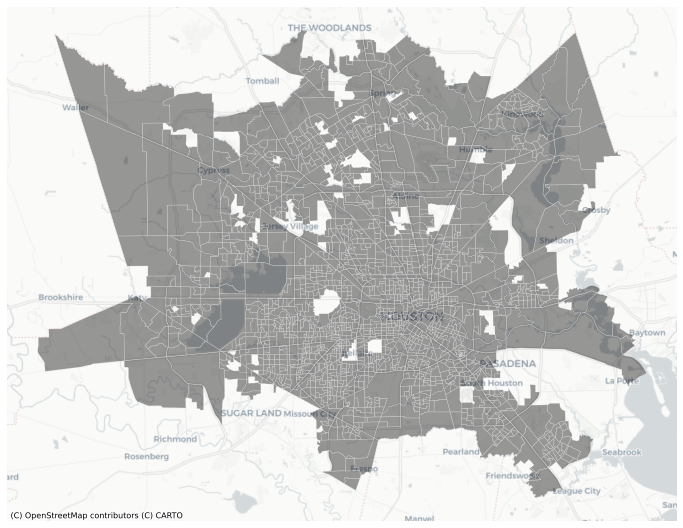

In [242]:
fig, ax = plt.subplots(figsize=(12,12))

gdf.plot(ax=ax,
         color='black', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)
ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

**now let's introduce our second data set**

import income dataset


In [243]:
gdf2= gpd.read_file('Mother Jones - Mass Shootings Database, 1982 - 2019.csv')

look at data dealing with 

In [244]:
gdf2.head()

,case,location,date,summary,fatalities,injured,total_victims,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,...,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,geometry
0,Molson Coors shooting,Workplace,2/26/20,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,51,-,-,...,Black,M,https://www.jsonline.com/story/news/local/2020...,-,-,43.044511,-87.962537,Mass,2020,None
1,Jersey City kosher market shooting,Other,12/10/19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,-,-,-,...,Black,-,https://www.nytimes.com/2019/12/15/nyregion/je...,-,-,40.707363,-74.083609,Spree,2019,None
2,Pensacola Naval base shooting,Military,12/6/19,"Ahmed Mohammed al-Shamrani, A Saudi Arabian mi...",3,8,11,-,-,-,...,-,M,https://www.washingtonpost.com/national-securi...,-,-,30.364707,-87.288567,Mass,2019,None
3,Odessa-Midland shooting spree,Other,8/31/19,"Seth A. Ator, 36, fired at police officers who...",7,25,32,36,yes,"""One friend of the family said the gunman had ...",...,White,M,https://www.washingtonpost.com/politics/5-kill...,https://www.nytimes.com/2019/09/02/us/texas-gu...,-,31.925974,-102.2796,Spree,2019,None
4,Dayton entertainment district shooting,Other,8/4/19,"Connor Betts, 24, died during the attack, foll...",9,27,36,24,-,-,...,White,M,https://www.nytimes.com/2019/08/04/us/dayton-o...,-,-,39.757312,-84.184947,Mass,2019,None


trim down columns and rename

In [245]:
gdf2 = gdf2[[
 'latitude',
 'longitude']]

check if trimed

In [246]:
gdf2.head()

,latitude,longitude
0,43.044511,-87.962537
1,40.707363,-74.083609
2,30.364707,-87.288567
3,31.925974,-102.2796
4,39.757312,-84.184947


In [247]:
gdf2.shape

(118, 2)

In [248]:
gdf2 = gpd.GeoDataFrame(gdf2, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(gdf2.longitude, gdf2.latitude))

In [249]:
gdf2 = gdf2.to_crs(epsg=3857)

In [250]:
gdf2.longitude = gdf2.longitude.astype('float')
gdf2.latitude = gdf2.latitude.astype('float')

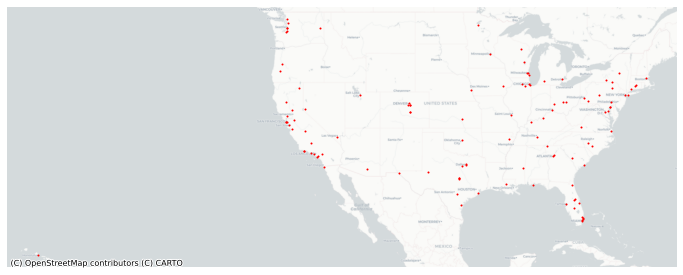

In [251]:
# map it!
fig,ax = plt.subplots(figsize=(12,12))

gdf2.plot(ax=ax,
             color='red',
             markersize=1)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


In [257]:
minx, miny, maxx, maxy = gdf.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-10685533.430958357
-10572996.661533259
3439099.720253502
3525498.55837201


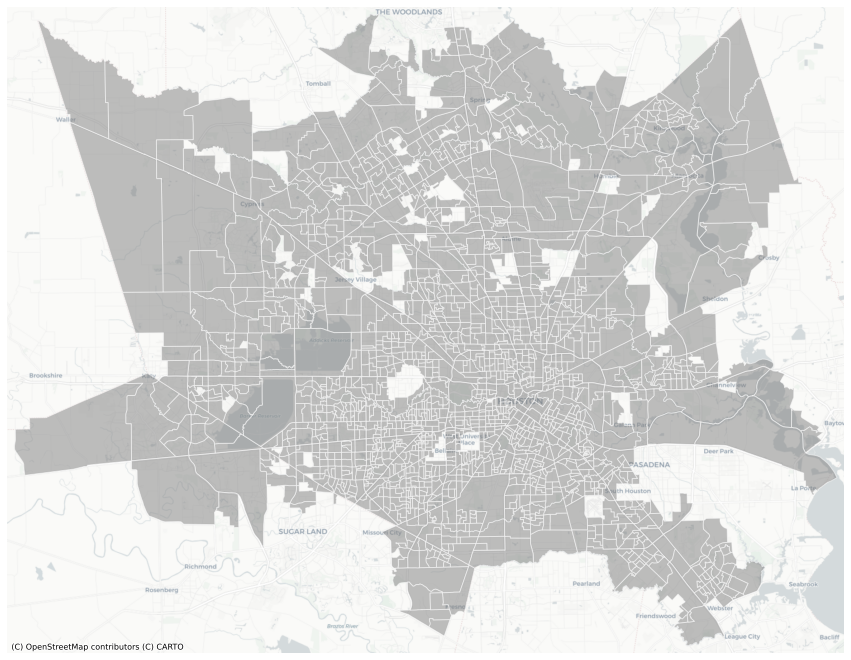

In [260]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(15, 15))

# block groups
gdf.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

# arrests
gdf2.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=1,
            alpha=0.2)

# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [261]:
join = gpd.sjoin(gdf2, gdf, how='left')
join.head()

,latitude,longitude,geometry,index_right,FIPS,TotalPop
0,43.044511,-87.962537,POINT (-9791944.828 5318749.331),NaN,NaN,NaN
1,40.707363,-74.083609,POINT (-8246949.630 4969273.125),NaN,NaN,NaN
2,30.364707,-87.288567,POINT (-9716918.831 3550516.200),NaN,NaN,NaN
3,31.925974,-102.279600,POINT (-11385712.991 3753597.482),NaN,NaN,NaN
4,39.757312,-84.184947,POINT (-9371425.432 4830737.940),NaN,NaN,NaN


In [262]:
gdf2_by_gdf = join.FIPS.value_counts().rename_axis('FIPS').reset_index(name='gdf2_count')

In [264]:
gdf2_by_gdf.head()

,FIPS,gdf2_count


**NOTE**
Hello Yoh, 
We hate to admit that our stubborness in "in trying to make it work" resulted in our inability to complete the assignment. We wanted to be transparent with you about our difficulty with the data set (as seen above) but we did put in a great effort to work through it. We will be submitting this late and after finding a data set that works better for what is asked from the assignment. We hope you understand and that the penalty doesn't affect us too greatly.WE WILL SUBMIT THIS! Thank you, Stacy & Ainsleigh 